---

# 00. About week8

---

1. Importing libraries
2. Sequence problems
3. Sequence layers and models
3. Introduction to Natural Language Processing

---

# 01. Importing libraries

---

In [ ]:
import tensorflow as tf
print(tf.__version__)

---

# 02. Sequence problems

---

## Sequence data

Sequence data is any type of data where the order of elements matters. It's a collection of items arranged in a specific sequence, and the position of each element within the sequence carries meaning.

**Key Characteristics of Sequence Data:**

* **Ordered:** The elements have a defined order, and changing the order changes the meaning of the data.
* **Variable Length:** Sequences can have different lengths, and the number of elements can vary.
* **Dependency:** The value or meaning of an element often depends on the elements that come before or after it in the sequence.

**Common Examples of Sequence Data:**

* **Text:** Sentences, paragraphs, documents, where the order of words conveys meaning.
* **Time Series:** Data points collected over time, such as stock prices, weather measurements, or sensor readings.
* **Audio:** Speech signals, music, or any sound recording where the order of sound waves matters.
* **Video:** A sequence of images captured over time, where the order of frames determines the motion.
* **Biological Sequences:** DNA, RNA, and protein sequences, where the order of nucleotides or amino acids determines their function.

## Mono - Many Problems

### Mono to Mono (One-to-One)

* **Input:** A single element.
* **Output:** A single element.
* **Example:** Image classification, where you input a single image and output a single label (e.g., "cat", "dog").

### Mono to Many (One-to-Many)

* **Input:** A single element.
* **Output:** A sequence of elements.
* **Example:** Image captioning, where you input a single image and output a sequence of words describing the image.

### Many to Mono (Many-to-One)

* **Input:** A sequence of elements.
* **Output:** A single element.
* **Example:** Sentiment analysis, where you input a sequence of words (a sentence or review) and output a single sentiment label (e.g., "positive", "negative").

###  Many to Many (Many-to-Many)

* **Input:** A sequence of elements.
* **Output:** A sequence of elements (where the input and output lengths can differ).
* **Example:** Machine translation, where you input a sequence of words in one language and output a sequence of words in another language.

---

# 03. Sequence layers and models

---

## Sequence layers

### Recurrent layers

Recurrent layers, or Recurrent Neural Networks (RNNs), are a type of neural network architecture specifically designed to handle sequential data. Unlike traditional feedforward networks, RNNs have connections that loop back on themselves, allowing them to maintain a "memory" of past inputs. This memory enables them to capture dependencies and patterns across time steps in a sequence.

**Key features and concepts of recurrent layers:**

* **Hidden State:** The core of an RNN is its hidden state, which acts as a memory bank. At each time step, the layer takes an input and updates its hidden state based on both the current input and the previous hidden state. This allows the network to retain information about past inputs and use it to influence its predictions for future inputs.
* **Time Steps:** Sequential data is processed one element at a time, with each element representing a time step. The RNN updates its hidden state at each time step, effectively "reading" the sequence from left to right.
* **Unrolled Representation:** To visualize how RNNs work, they are often depicted as unrolled networks, where each time step is represented as a separate layer with shared weights. This highlights the fact that the same operations are applied to each element in the sequence.

**Types of recurrent layers:**

* **SimpleRNN:** The most basic type of RNN, where the hidden state is updated using a simple linear transformation and an activation function.
* **LSTM (Long Short-Term Memory):** A more sophisticated RNN architecture designed to address the vanishing gradient problem, which can hinder the learning of long-range dependencies. LSTMs introduce gates (input, forget, output) that control the flow of information in and out of the hidden state, allowing them to selectively remember or forget information.
* **GRU (Gated Recurrent Unit):** A simplified variant of LSTM with fewer gates, offering comparable performance with reduced complexity.

In [ ]:
units = 10

tf.keras.layers.SimpleRNN(units, activation='tanh')
tf.keras.layers.LSTM(units, activation='tanh')
tf.keras.layers.GRU(units, activation='tanh')

### Convolutional layers

Convolutional layers, typically associated with image processing, can also be effectively applied to sequence data. In this context, they are known as 1D convolutional layers and are used to extract local features and patterns within sequences.

**How convolutional layers work on sequence problems:**

* **Input:** The input to a 1D convolutional layer is a sequence of data, such as a time series or a text document represented as a sequence of word embeddings.
* **Filters:** Instead of 2D filters used in image processing, 1D convolutional layers use 1D filters that slide along the time dimension of the sequence. These filters have a width (kernel size) that determines the number of consecutive elements they consider at each step.
* **Feature Maps:** As the filters slide across the sequence, they perform element-wise multiplications and summations, producing feature maps that capture local patterns within the sequence.
* **Pooling:** Optionally, pooling layers can be applied after the convolutional layers to reduce the dimensionality of the feature maps and extract the most salient features.

**Advantages of using convolutional layers on sequence problems:**

* **Local Feature Extraction:** They can capture local patterns and dependencies within the sequence, such as short-term trends in time series data or n-grams in text data.
* **Position Invariance:** The same filter is applied across the entire sequence, making the model robust to variations in the position of features within the sequence.
* **Efficient Computation:** Convolutional operations can be efficiently implemented using parallel processing techniques.

In [ ]:
filters = 32
kernel_size = 3
pool_size = 2

tf.keras.layers.Conv1D(filters, kernel_size, activation='relu')
tf.keras.layers.MaxPooling1D(pool_size)

### Attention layers

Attention layers are a powerful mechanism in neural networks that allow the model to focus on specific parts of the input when making predictions. Inspired by human attention, where we selectively focus on relevant information, attention layers enable models to weigh different parts of the input differently, improving performance on tasks requiring context understanding.

**Key concepts of attention layers:**

* **Queries, Keys, and Values:** Attention mechanisms operate on three sets of vectors: queries, keys, and values. Queries represent what the model is looking for, keys represent the different parts of the input, and values contain the information associated with each key.
* **Attention Weights:** The attention mechanism computes a weight for each key, indicating its relevance to the current query. These weights are typically normalized to sum to 1.
* **Weighted Sum:** The model then computes a weighted sum of the values, using the attention weights to prioritize the most relevant information.

**Types of attention mechanisms:**

* **Scaled Dot-Product Attention:** A common attention mechanism that computes attention weights based on the dot product between queries and keys, scaled by the square root of the key dimension.
* **Additive Attention:** An alternative attention mechanism that computes attention weights using a feedforward neural network.
* **Self-Attention:** A special case of attention where the queries, keys, and values all come from the same input sequence. This allows the model to attend to different parts of the input itself, capturing long-range dependencies.

In [ ]:
tf.keras.layers.Attention()

## Sequence models

### Recurrent Neural Networks (RNNs)

The architecture of a Recurrent Neural Network (RNN) is designed to process sequential data by maintaining a hidden state that captures information from past inputs. This allows the network to learn dependencies and patterns across time steps in a sequence.

Key components of RNN architecture:

Input Layer: This layer takes a sequence of elements as input, such as a time series or a text document represented as a sequence of word embeddings. Each element in the sequence is presented to the network at a separate time step.

Hidden Layer: The hidden layer is the core of an RNN, where the magic of capturing temporal dependencies happens. It contains a set of recurrent units (neurons) that receive input from both the current input element and the hidden state from the previous time step. The hidden state acts as a memory, storing information about past inputs and influencing the processing of current and future inputs.

Output Layer: This layer produces the output for each time step. The output can be a single value (e.g., for sequence classification) or a sequence of values (e.g., for sequence generation or sequence labeling).

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(None, 10)),
    tf.keras.layers.SimpleRNN(units=64),
    tf.keras.layers.Dense(1)
])

### Sequence-to-Sequence Models (Seq2Seq)

Seq2Seq (Sequence-to-Sequence) models are a type of neural network architecture designed for tasks where both the input and output are sequences of varying lengths. They are widely used in machine translation, text summarization, speech recognition, and other tasks that involve mapping one sequence to another.

**Key components of Seq2Seq architecture:**

* **Encoder:** The encoder processes the input sequence and compresses it into a fixed-size vector called the context vector. It typically uses recurrent layers (like LSTM or GRU) to capture the dependencies between elements in the input sequence.

* **Decoder:** The decoder takes the context vector as input and generates the output sequence, one element at a time. It also typically uses recurrent layers, and at each time step, it predicts the next element in the output sequence based on the context vector and the previously generated elements.

* **Attention Mechanism:** In many Seq2Seq models, an attention mechanism is used to allow the decoder to focus on different parts of the input sequence at each time step. This helps the model to better capture long-range dependencies and improve the accuracy of the generated output.

In [ ]:
input_dim = 10
output_dim = 20
latent_dim = 256

# Encoder
encoder_inputs = tf.keras.Input(shape=(None, input_dim))
encoder_lstm = tf.keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = tf.keras.Input(shape=(None, output_dim))
decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = tf.keras.layers.Dense(output_dim, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model
model = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)


### Transformer Models

Transformer architecture is a neural network design that has revolutionized the field of Natural Language Processing (NLP) and is increasingly being applied to other domains. Unlike traditional recurrent neural networks (RNNs), Transformers rely entirely on self-attention mechanisms to capture dependencies between elements in a sequence, enabling efficient parallelization and handling of long-range dependencies.

**Key Components of Transformer Architecture:**

* **Input Embedding:** Similar to other NLP models, Transformers start by converting input tokens (words, subwords, etc.) into numerical representations called embeddings.

* **Positional Encoding:** Since Transformers don't inherently capture the order of elements in a sequence, positional encodings are added to the embeddings to provide information about the position of each token.

* **Encoder:** The encoder consists of multiple identical layers, each containing two sub-layers:

 * **Multi-Head Self-Attention:** This mechanism allows each token to attend to all other tokens in the input sequence, weighted by their relevance. It computes multiple attention heads in parallel and concatenates their results.
 * **Feed-Forward Network:** A simple feed-forward neural network applied to each token independently.
* **Decoder:** The decoder also consists of multiple identical layers, similar to the encoder, but with an additional sub-layer:

 * **Masked Multi-Head Attention:** This attention mechanism prevents the decoder from attending to future tokens, ensuring that the prediction at each time step depends only on the previously generated tokens.
 * **Output Layer:** The final layer of the decoder maps the hidden states to a probability distribution over the output vocabulary, allowing the model to generate the next token in the sequence.

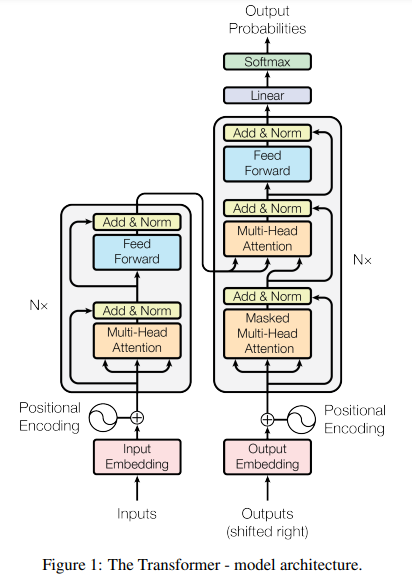

---

# 04. Introduction to Natural Language Processing

---

## Text Preprocessing

**Tokenization:** Split text into words or subwords.



```
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
```



**Padding:** Ensure all sequences have the same length.



```
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences)
```



## Word Embeddings

**Pre-trained Embeddings:** Use pre-trained word vectors (e.g., Word2Vec, GloVe) to represent words as dense vectors.



```
from gensim.models import Word2Vec
embedding_layer = Word2Vec(sentences, min_count=1)
```



**Trainable Embeddings:** Learn word embeddings from scratch during model training.



```
embedding_layer = tf.keras.layers.Embedding(vocab_size, embedding_dim)
```



## NLP Models

**Recurrent Neural Networks (RNNs):** Process sequences by maintaining a hidden state.



```
model = tf.keras.Sequential([
       embedding_layer,
       tf.keras.layers.LSTM(units),
       tf.keras.layers.Dense(num_classes, activation='softmax')
   ])
```



**Convolutional Neural Networks (CNNs):** Extract local features using 1D convolutions.



```
model = tf.keras.Sequential([
       embedding_layer,
       tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
       tf.keras.layers.GlobalMaxPooling1D(),
       tf.keras.layers.Dense(num_classes, activation='softmax')
   ])
```



**Transformers:** Utilize self-attention mechanisms for capturing long-range dependencies.

## Example

> https://github.com/efekaanguler/ai-ml_samples/blob/main/bbc_nlp_classification.ipynb